#**Graduate Rotational Internship Program (GRIP)**

**Name: SHIVANI TIWARI**

**Title: Exploratory Data Analysis- Terrorism**

**Level: Intermediate**

**Batch: March**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading dataset

In [ ]:
data = pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding = 'latin1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#Step 2: Understanding the Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude',
    'longitude':'Longitude','summary':'Summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'Killed',
     'nwound':'Wounded'},inplace=True)

In [ ]:
data = data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',"Attacktype",'Killed',
               'Wounded','target1','Summary','Group','Targettype','Weapon','motive']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   Day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   Latitude    177135 non-null  float64
 8   Longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  Killed      171378 non-null  float64
 11  Wounded     165380 non-null  float64
 12  target1     181055 non-null  object 
 13  Summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

In [ ]:
data.shape

(181691, 18)

In [ ]:
# Checking for column names
data.columns.values

array(['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City',
       'Latitude', 'Longitude', 'Attacktype', 'Killed', 'Wounded',
       'target1', 'Summary', 'Group', 'Targettype', 'Weapon', 'motive'],
      dtype=object)

In [ ]:
data.shape

(181691, 18)

In [ ]:
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
Attacktype         0
Killed         10313
Wounded        16311
target1          636
Summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [ ]:
Killed_per_region=data.groupby(['Region'],as_index=False)['Killed']
Killed_per_region.sum()

,Region,Killed
0,Australasia & Oceania,150.0
1,Central America & Caribbean,28708.0
2,Central Asia,1000.0
3,East Asia,1152.0
4,Eastern Europe,7415.0
5,Middle East & North Africa,137642.0
6,North America,4916.0
7,South America,28849.0
8,South Asia,101319.0
9,Southeast Asia,15637.0


#Step 4: Data Visualization

Heatmap

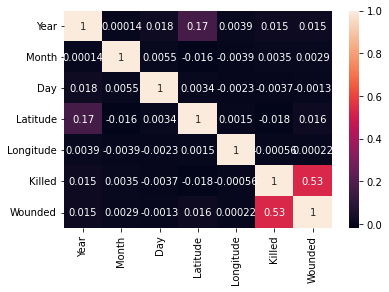

In [ ]:
sns.heatmap(data.corr(),annot=True)

**Countries Affected**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


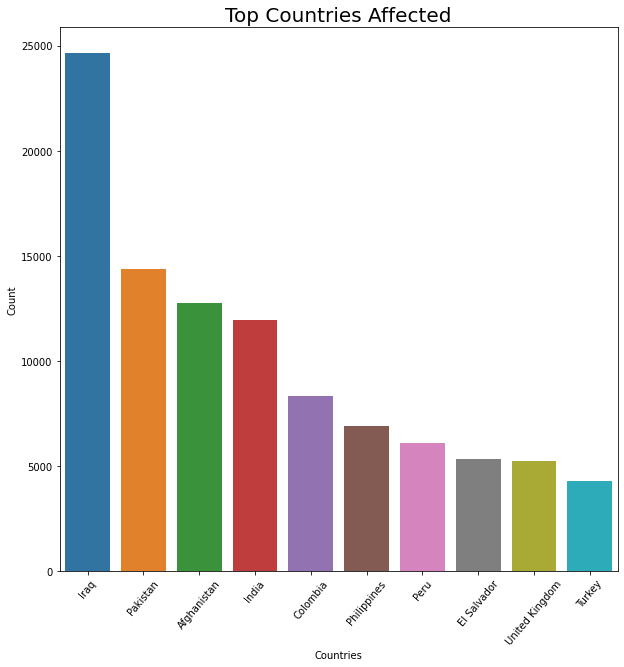

In [ ]:
plt.subplots(figsize=(10,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10])
plt.title('Top Countries Affected',fontsize=20)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

**Number of killed**

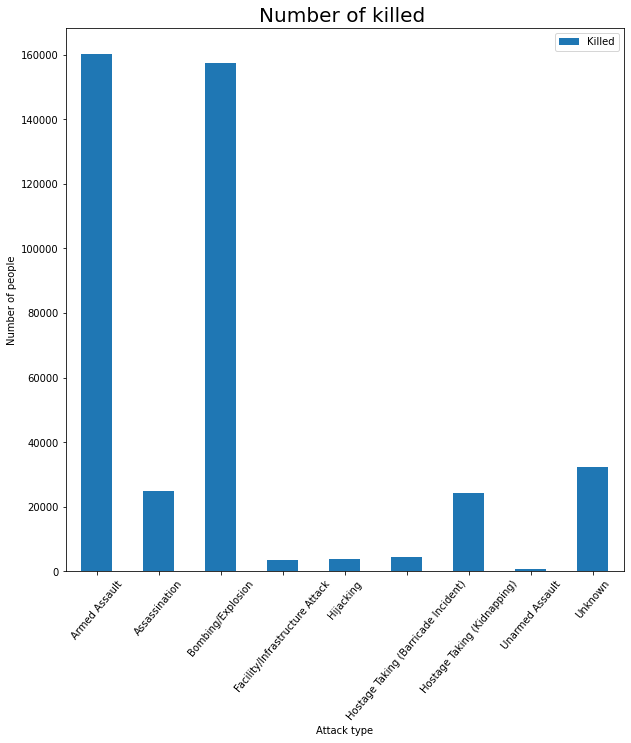

In [ ]:
data[['Attacktype','Killed']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(10,10))
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people')
plt.xlabel('Attack type')
plt.show()

**Number of Wounded**

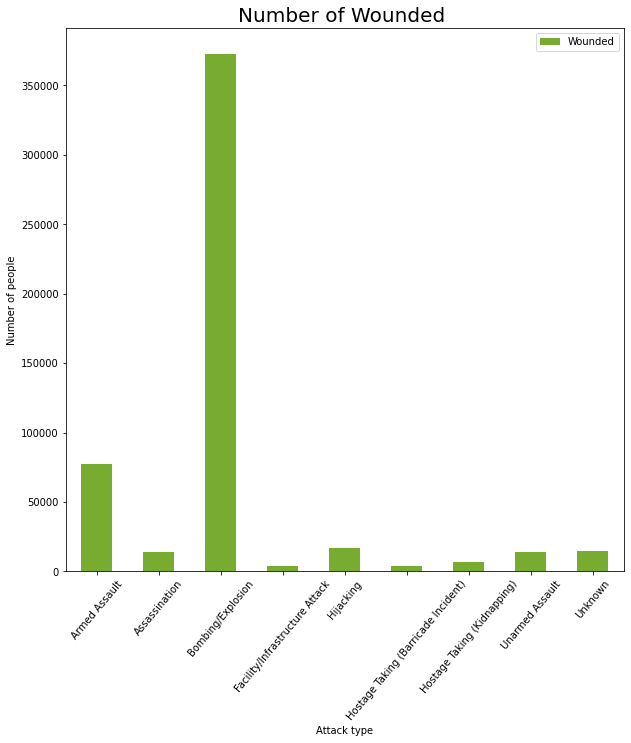

In [ ]:
data[['Attacktype','Wounded']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(10,10),color='#77AC30')
plt.xticks(rotation=50)
plt.title("Number of Wounded ",fontsize=20)
plt.ylabel('Number of people')
plt.xlabel('Attack type')
plt.show()

**Terrorist Activities By Region In Each Year**

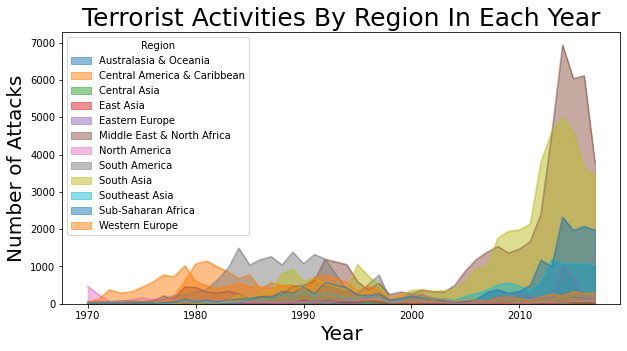

In [ ]:
pd.crosstab(data['Year'], data['Region']).plot(kind = 'area', stacked = False, figsize = (10,5))
plt.title('Terrorist Activities By Region In Each Year', fontsize = 25)
plt.ylabel('Number of Attacks', fontsize = 20)
plt.xlabel("Year", fontsize = 20)
plt.show()

In [ ]:
Attack_per_country = data['Country'].value_counts()[:10]
print(Attack_per_country)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64


**Method of Attack**

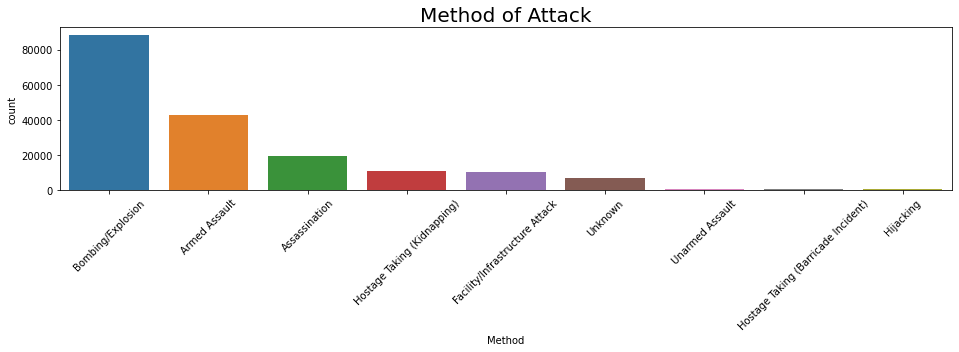

In [ ]:
plt.figure(figsize=(16,3))
sns.countplot(x = data['Attacktype'], order = data['Attacktype'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Method')
plt.title('Method of Attack',fontsize=20)
plt.show()

**Counting terrorist activities each year through countplot **

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


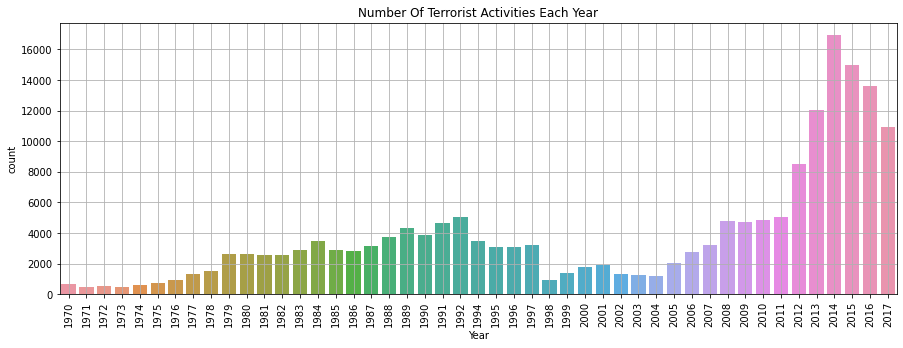

In [ ]:

plt.subplots(figsize=(15,5))
sns.countplot('Year',data = data)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.grid()
plt.show()